# _TP especial Fundamentos de la Ciencia de Datos_<br>
### _Grupo 7: Buralli, Todesco, Antúnez_


## <u>Descarga y lectura de archivos<u>

Empezaremos descargando y leyendo los archivos mandados por la cátedra

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

covers_dataset = pd.read_csv('Covers.csv')

Hacemos una vista general para saber de que se trata el dataset, que significan cada una de sus columnas

In [ ]:
covers_dataset.head()

## <u>Descripción de las variables<u>
* ```Track```: nombre de la canción
* ```Artist```: nombre del artista o intérprete
* ```Duration```: duración en minutos de la canción
* ```Time_Signature```: número de pulsaciones por compás
* ```Danceability```: medida de que tan bailable es la canción(entre 0 y 1)
* ```Energy```: medida de que tan enérgica es la canción(entre 0 y 1)
* ```Key```: tonalidad de la canción, número entero
* ```Loudness```: volumen de la canción, en decibelios
* ```Mode```: tono mayor o menor(0 o 1, respectivamente)
* ```Speechiness```: medida de presencia de palabras habladas en las canciones, valores altos indican una alta presencia de estas palabras
* ```Acoustiness```: mide que tan acústica es la pista
* ```Instrumentalness```: mide la presencia de voces en las canciones, valores más altos indican una canción con mayor parte instrumental
* ```Liveness```: probabilidad de que dicha canción se haya interpretado en vivo, niveles más altos indican mayor presencia de voces de la audiencia
* ```Valance```: medida de la positividad de la canción, niveles más altos indican presencias de mlodías alegres
* ```Tempo```: velocidad de la pista, medida en beats por minutos(BPM)
* ```Popularity```: puntuación de la canción que mide su popularidad
* ```Year```: año de lanzamiento

Identificaremos la cantidad de nulos mediante el comando ```isna()```

In [ ]:
covers_dataset.isna().sum()

Observamos que no hay NaNs, pero esto no descarta la presencia de valores extraños a analizar en las distintas columnas, por lo que verificaremos mediante el método ```value_count()```

## <u>Revision de valores<u>

In [ ]:
covers_dataset["Track"].value_counts()

En ```Track``` parece no haber presencia de valores raros, si algunos nombres repetidos.

In [ ]:
covers_dataset["Artist"].value_counts()

Con ```Artist``` parace algo similar, nada extraño a primera vista

In [ ]:
covers_dataset["Duration"].value_counts()

```Duration``` tampoco parece tener valores atípicos, aunque luego habría que convertir el dato a algo numérico.

In [ ]:
covers_dataset['Time_Signature'].value_counts()

```Time_Signature``` parece correcto.

In [ ]:
covers_dataset['Danceability'].value_counts()

En ```Danceability``` no parece que haya nada raro.

In [ ]:
covers_dataset['Energy'].value_counts()

A primera vista no parece haber valores extraño.

In [ ]:
covers_dataset['Key'].value_counts()

Todo parece normal en ```Key```.

In [22]:
covers_dataset['Loudness'].value_counts()

Loudness
-7.440     3
-8.412     3
-5.484     3
-5.109     3
-10.419    3
          ..
-10.952    1
-5.395     1
-4.699     1
-7.063     1
-7.435     1
Name: count, Length: 842, dtype: int64

Sospechosos los valores que se repiten 3 veces siendo una variable continua pero aceptable...

In [ ]:
covers_dataset['Mode'].value_counts()

Predominancia del valor de 1 en ```Mode```.

In [ ]:
covers_dataset['Speechiness'].value_counts()

Valores repetidos en una variable continua. Candidatos a invertigacion: 0.0352,0.0321,0.0270    

In [ ]:
covers_dataset['Acousticness'].value_counts()

Hay valores repetidos 5 veces, puede investigarse...

In [ ]:
covers_dataset['Instrumentalness'].value_counts()

Muchos registros con 0 de ```Instrumentalness```, asumimos que 0 significa que la cancion es "Acapella" valores altos de ```instrumentalness``` como bien describimos al principio corresponden o "deberian" corresponder a canciones con mayor presencia instrumental. Mientras que valores menores indican lo contrario. Resaltamos el ```deberia``` porque investigando algunas canciones con valores ```instrumentalness``` estas si poseen instrumentacion.

In [ ]:
covers_dataset['Instrumentalness'].max()

In [ ]:
covers_dataset['Liveness'].value_counts()

A primera vista no sabemos bien la razon pero en ```Liveness``` hay valores repetidos en 0.1xxx osea todos los valores que son 0.1 y algo mas.

In [ ]:
covers_dataset['Valence'].value_counts()

Algunos valores repetidos en ```Valence``` pero zafa...

In [ ]:
covers_dataset['Tempo'].value_counts()

Aceptable, quizas los valores 118.777 y 100.002 podrian revisarse, tampoco que se repitan tanto en ```Tempo```

In [ ]:
covers_dataset['Popularity'].value_counts()

Variable discreta asi que esta bien que se repitan cosas. Tampoco exageremos!

In [ ]:
covers_dataset['Year'].value_counts()

Vemos que todas las canciones son de los '90, pero nada extraño que destacar.

## <u>Corrección de tipos<u>

 Ahora nos ocuparemos de comprobar que los tipos de las variables sean adecuados a lo que representan. Para ello, usamos el método ```info()```

In [ ]:
covers_dataset.info()

Hacemos una copia mediante el método ```copy()``` para no arruinar el dataset original

In [40]:
copy_covers_ds = covers_dataset.copy()

Nos centraremos en arreglar el tipo de la variable ```Duration```, convirtiendolo de string a integer(segundos)

In [41]:
#Por las dudas hacemos un cambio de tipos a string.
copy_covers_ds['Duration'] = copy_covers_ds['Duration'].astype(str)
#Creamos la nueva columna con los valores correctos convertidos a segundos(todavia no estan los valores).
copy_covers_ds['DURATION(s)'] = 0
#Por cada registro hacemos:
for index,row in copy_covers_ds.iterrows():
    #duracion original se vuelve el valor de duracion de la fila.
    duracion_original = row['Duration']
    #Separamos por : los minutos y segundos.
    minutos , segundos = duracion_original.split(':')
    #Asignamos los minutos * 60 + los segundos obtenidos a la fila en la columna nueva, casteamos ambos parametros a segundos porque sino hace cualquier cosa.
    copy_covers_ds.at[index,'DURATION(s)'] = int(minutos) * 60 + int(segundos)
#Mostramos resultados.
copy_covers_ds.head()

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year,DURATION(s)
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,1,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990,251
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,1,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990,225
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,0,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990,236
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990,245
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,0,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990,201


## <u>Analisis de distribuciones<u>


Ahora observaremos como se distribuye cada variable para poder aprender un poco sobre el conjunto de datos y obtener conclusiones. Tomaremos las variables más interesantes para analizar y cuyo gráfico nos pueda aportar algo de valor

### Analisis de ```Valence```

In [ ]:
import numpy as np

# Ordenamos los datos
valence_sort = copy_covers_ds['Valence'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(valence_sort, bins=bins)

# Añadimos título y etiquetas
plt.title('Histograma de Valence')
plt.xlabel('Valence')
plt.ylabel('Cantidad de canciones')
plt.xticks(np.arange(0,1,0.1))

# Mostramos el gráfico
plt.show()

La curva se ve bastante balanceada, hay un pico justo en el centro de la distribucion lo que indica una gran cantidad de canciones con una valenic apromedio.

In [ ]:
mas_valencia =  copy_covers_ds[covers_dataset['Valence'] > 0.95].sort_values('Valence')
mas_valencia

In [ ]:
menos_valencia =  copy_covers_ds[covers_dataset['Valence'] < 0.05].sort_values('Valence')
menos_valencia

### Analisis de ```Popularity```

In [ ]:
import numpy as np

# Ordenamos los datos
popularity_sort = copy_covers_ds['Popularity'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(popularity_sort, bins=bins)

# Añadimos título y etiquetas
plt.title('Histograma de Popularity')
plt.xlabel('Popularity')
plt.ylabel('Cantidad de canciones')
plt.xticks(np.arange(0,100,5))

# Mostramos el gráfico
plt.show()

Podemos ver una curva bastante sesgada hacia la izquierda. Analicemos las canciones con mas popularidad!

In [ ]:
mas_populares =  copy_covers_ds[covers_dataset['Popularity'] > 85].sort_values('Popularity')
mas_populares

Ahora las menos populares!

In [ ]:
menos_populares =  copy_covers_ds[covers_dataset['Popularity'] < 15].sort_values('Popularity')
menos_populares

In [ ]:
# Nos quedamos solo con la columna Danceability
popularity = covers_dataset["Popularity"]

# Creamos el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=popularity)
plt.title("Boxplot de Popularity")
plt.xlabel("Popularity")
plt.show()

Podrian eliminarse las canciones con pupularidad cerna a 0, tampco exageremos y borremos todas, pero cancion con una popularidad de 0 no nos inspira muchha confianza.

El box plot confirma una tendencia a valores mas altos de popularidad y tambien detecta algunos outliers. En el histograma se veia una concentracion de canciones con popularidad entre 0 y 5. No son canciones conocidas las que se concentran ahi pero nos resulta un poco raro. La variable en si es rara, no sabemos en base a que fue medida la popularidad de la cancion. Los valores pueden estar condicionados debido a que el dataset esta acotado a covers de los 90s, si los datos fueron recuperados cercanamente a la decada de los noventa por ejemplo los 2000s las personas escucharian estos covers mas que si nos alejaramos de los 90s y a medida que saldrian nuevas canciones y covers los valores se verian disminuidos  .Quizas recolectaron datos de otra aplicacion o de alguna plataforma de musica. Tampcoo sabemos que usaron de parametro para medirla, si las escuchas mensuales, discos vendidos, me gustas etc.

### Analisis de ```Danceability```

Con el método ```value_counts()``` no se vió nada extraño. Por lo tanto, vamos a hacer un boxplot para ver mas en detalle la distribución de la variable.

In [ ]:
# Nos quedamos solo con la columna Danceability
danceability = covers_dataset["Danceability"]

# Creamos el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=danceability)
plt.title("Boxplot de Danceability")
plt.xlabel("Danceability")
plt.show()

In [ ]:
min = copy_covers_ds["Danceability"].min()
copy_covers_ds[copy_covers_ds["Danceability"] == min]

Parece que hay unos valores del lado izquierdo, podrian ser posibles outliers. 

Podemos observar esta distribución de una forma más clara mediante un histograma

In [ ]:
bins = 40

plt.hist(copy_covers_ds['Danceability'], bins = bins)

plt.xlabel('Danceability')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de la bailabilidad')
plt.show()

In [ ]:
#Vamos a mirar quiénes son las canciones que son poco bailables
poco_bailables = copy_covers_ds[copy_covers_ds["Danceability"] < 0.2]
poco_bailables

Podemos ver que, por ejemplo, "Frozen" de Madonna es una canción poco bailable. En particular, 3 de las 7 canciones menos bailables son también poco enérgicas, por lo que valdría la pena en un futuro análisis corroborar si existe una correlación fuerte entre ```Danceability``` y ```Energy```

### Analisis de ```Duration```

In [ ]:
bins = 40

plt.hist(copy_covers_ds['DURATION(s)'], bins = bins)

plt.xlabel('Duración (s)')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de duración de las canciones')
plt.xticks(range(0, 450, 50))
plt.show()

Se puede ver que la mayoría de las canciones duran entre 150 y 300 segundos(2:30 y 5:00 minutos). Hay algunos outliers que superan los 500 segundos(8:33 minutos) y hay que corroborrar que sean correctos

In [ ]:
max = copy_covers_ds["DURATION(s)"].max()
copy_covers_ds[copy_covers_ds["DURATION(s)"] == max]

Corroboramos en internet que la canción dura 3:29 minutos, paro no meter mano en los datos podemos simplemente borrar estos tres outliers para que no molesten.

In [ ]:
copy_covers_ds[copy_covers_ds['DURATION(s)'] > 500]

La segunda canción más larga es "November Rain" de Guns 'n Roses y su duración concuerda con el dataset

Podemos tomar como medida eliminar estos tres outliers que nos estan afectando la distribucion en la curva.

In [ ]:
copy_covers_ds = copy_covers_ds[copy_covers_ds['DURATION(s)'] < 500]

In [ ]:
bins = 40

plt.hist(copy_covers_ds['DURATION(s)'], bins = bins)

plt.xlabel('Duración (s)')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de duración de las canciones')
plt.xticks(range(0, 450, 50))
plt.show()

Ahora si ;)

### Analisis de ```Loudness```

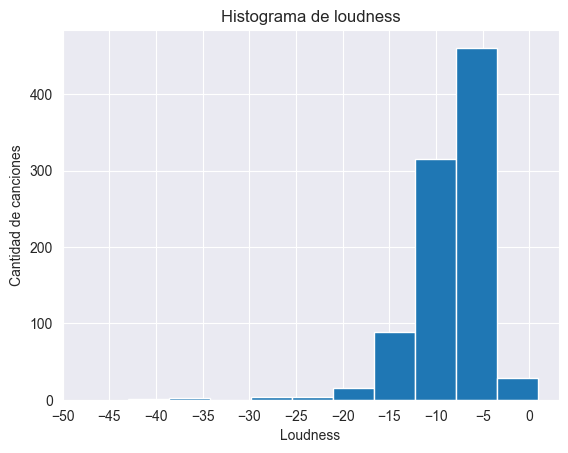

In [23]:
bins = 10

plt.hist(copy_covers_ds['Loudness'], bins = bins)

plt.xlabel('Loudness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de loudness')
plt.xticks(range(-50, 5, 5))
plt.show()

Podemos ver que hay algunos valores que son minoria abajo de -20db, veamos quienes son.

In [ ]:
copy_covers_ds[copy_covers_ds['Loudness'] < -20]


Son en total 12 canciones, de las cuales hay un valor min. Cercano a -40.

In [ ]:
loudness = copy_covers_ds['Loudness']
loudness.describe()

Vemos que hay un valor minimo de -42. La verdad que no sabemos bien en base a que fue medida esta variable ni que usaron de referencia.
 Si sacamos concluciones podriamos decir que es una medida en base al umbral de audicion humano o es en base a que en 0db la cancion se deberia escuchar bien, en valores negativos bajo y en valores positivos alto.La primera opcion puede ser descartada ya que si seria en base a nuetra audicion un valor de -42db significaria que directamente no escuchamos la cancion cosa que no nos parece consistente.Consideremos entonces que es en base a una escala en la que 0 db es lo recomendado para que la cancion se escuche bien.Saquemos los valores dudosos!

In [ ]:
copy_covers_ds = covers_dataset[covers_dataset['Loudness'] > -20]

In [ ]:
bins = 10

plt.hist(copy_covers_ds['Loudness'], bins = bins)

plt.xlabel('Loudness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de loudness')
plt.xticks(range(-20, 5, 5))
plt.show()

La gran mayoria de los valores se encuentran entre -10 y -5, y se puede apreciar un ligero sesgo hacia la izquierda. Igualmente nos resultan raro tantos valores de decibeles negativos. 

### Analisis de ```Instrumentalness```

In [ ]:
bins = 5

plt.hist(copy_covers_ds['Instrumentalness'], bins = bins)

plt.xlabel('Instrumentalness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de Instrumentalizacion de las canciones')
plt.xticks(np.arange(0, 1, 0.2))
plt.show()

Podriamos discretizar la variable, por ejemplo utilizar una escala "nula, baja, media, alta"

In [ ]:
#Creamos la nueva columna con las variable discretizada(todavia no hay nada) y la inicializamos en nulo.
copy_covers_ds['Instrumentalness Type'] = pd.NA
#Por cada registro hacemos:
for index,row in copy_covers_ds.iterrows():
    #Consideramos los 4 casos(intervalos) y asignamos el nueva valor segun corresponda
    instrulmentalness_original = row['Instrumentalness']
    if(instrulmentalness_original == 0):
        instrulmentalness_nueva = 'nula'
    elif(instrulmentalness_original > 0 and instrulmentalness_original <= 0.4 ) :
        instrulmentalness_nueva = 'baja'
    elif(instrulmentalness_original > 0.4 and instrulmentalness_original <= 0.7) :
        instrulmentalness_nueva = 'media'
    elif(instrulmentalness_original > 0.7 and instrulmentalness_original <= 1) :
        instrulmentalness_nueva = 'alta'
        
    copy_covers_ds.at[index,'Instrumentalness Type'] = instrulmentalness_nueva

copy_covers_ds.head()

In [ ]:
# Contar la cantidad de cada tipo de 'Instrumentalness Type'
instrumentalness_counts = copy_covers_ds['Instrumentalness Type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
instrumentalness_counts.plot(kind='bar')
plt.title('Distribución de Instrumentalness')
plt.xlabel('Instrumentalness Type')
plt.ylabel('Cantidad de canciones')
plt.show()

Podemos ver que hay muchas canciones con instrumentalizacion baja(cuidado que el intervalo para bajo es un poco mayor(0.1). Y que tambien hay muchas canciones con una instrumentalizacion nula(0 de instrumentalizacion)

### Analisis de ```Time Signature```

In [ ]:
# Contar la cantidad de cada tipo de 'Instrumentalness Type'
Time_signature_counts = copy_covers_ds['Time_Signature'].value_counts()

plt.figure(figsize=(6,6))
Time_signature_counts.plot(kind = 'bar')
plt.yticks(range(0,901,100))
plt.xticks(rotation = 0)
plt.title('Cantidad de canciones por pulsaciones por compás')
plt.xlabel('Signatura', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

Observamos que la gran mayoría de las canciones tienen 4 pulsaciones por compas, es un compás muy común según investigamos.

### Analisis de ```Liveness```

In [ ]:
bins = 10

plt.hist(copy_covers_ds['Liveness'], bins = bins,color='green')

plt.xlabel('Liveness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de la Liveness de las canciones')
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

Vemos una distribucion muy sesgada hacia la derecha, lo que quiere decir que probablemente haya muchas canciones con poca presencia de la audiencia. Hay un par de valor que podrian ser posibles outliers ariba de 0.9 pero realmente no nos parece significante.

### Analisis de ```Energy```


In [ ]:
bins = 10

plt.hist(copy_covers_ds['Energy'], bins = bins,color='yellow')

plt.xlabel('Energy')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de la Energy de las canciones')
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

Podemos observar una cuerva bastante sesgada hacia la derecha, lo que indica una gran presencia de canciones energéticas. Sinceramente como con muchas otras variables no sabemos como es que fueron medidas, como pasa en el caso de esta variable. ¿Como midieron la energia de la cancion? ¿estara ligada al ritmo?

Algunas canciones con un valor de energía bajo son:

In [ ]:
copy_covers_ds[copy_covers_ds['Energy'] < 0.1]

In [ ]:
# Nos quedamos solo con la columna Energy
energy = covers_dataset["Energy"]

# Creamos el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=energy)
plt.title("Boxplot de Energy")
plt.xlabel("Energy")
plt.show()

### Analisis de ```Key```

In [ ]:
import matplotlib.pyplot as plt

# Contamos la cantidad de cada tipo de 'Key'
key_counts = copy_covers_ds['Key'].value_counts().sort_index()

# Creamos el gráfico de barras
plt.figure(figsize=(8, 6))
key_counts.plot(kind='bar')

# Establecemos las etiquetas del eje x para las tonalidades(Time_Signature)
plt.xticks(ticks=range(len(key_counts)), labels=['Do', 'Do#', 'Re', 'Re#', 'Mi', 'Fa', 'Fa#', 'Sol', 'Sol#', 'La', 'La#', 'Si'],rotation=0)

plt.title('Distribución de Key')
plt.xlabel('Key')
plt.ylabel('Cantidad de canciones')
plt.show()


In [ ]:
# Contar la cantidad de cada tipo de 'Key'
key_counts = copy_covers_ds['Key'].value_counts().sort_values()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
key_counts.plot(kind='bar')

plt.xticks(ticks=range(len(key_counts)), labels=['Do', 'Do#', 'Re', 'Re#', 'Mi', 'Fa', 'Fa#', 'Sol', 'Sol#', 'La', 'La#', 'Si'],rotation=0)
plt.title('Distribución de Key')
plt.xlabel('Key')
plt.ylabel('Cantidad de canciones')
plt.show()

Podemos ver que la mayoría de las canciones están escritan en tonalidad Si. No podemos saber si escala menor o mayor debido a que eso nos lo indica otra variable, ```Mode```

### Analisis de ```Speechiness```

Es la medida de presencia de palabras habladas en las canciones, valores altos indican una alta presencia de estas palabras.

In [ ]:
copy_covers_ds['Speechiness'].describe()

Es una variable cuantitativa continua

De la funcion describe() se puede ver que hasta el 75% de los datos son valores muy bajos debajo de 0.1

Esto podria significar que la mayoria de las canciones no tienen casi palabras habladas. Con palabras habladas pensamos que una cancion con valores altos seria una cancion de rap por ejemplo. 

Aunque tampoco hay ninguna que sea totalmente hablada, ya que el maximo llega a 0.529.

In [ ]:
bins = 15

plt.hist(copy_covers_ds['Speechiness'], bins = bins)

plt.xlabel('Speechiness')
plt.ylabel('Cantidad de canciones')
plt.title('Histograma de Speechiness')
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(range(0,601,50))
plt.show()

Luego de realizar el histograma volvemos a confirmar que hay muchisimas canciones con valores bajos.

In [ ]:
plt.figure(figsize=(6, 6))
plt.boxplot(copy_covers_ds['Speechiness'])
plt.ylabel('Speechiness')
plt.show()

Realizamos el boxplot para ver si quizas habia un valor solo alejado, pero en verdad esta distribuido medio parejo los valores mas alla del 75%. 

In [ ]:
max = copy_covers_ds["Speechiness"].max()
copy_covers_ds[copy_covers_ds["Speechiness"] == max]

In [ ]:
min = copy_covers_ds["Speechiness"].min()
copy_covers_ds[copy_covers_ds["Speechiness"] == min]

Para chusmear un poco más, la cancion con el maximo de Speechiness es algo como Hip Hop, Pop Rap según lo que buscamos. Tiene sentido quiza que este ahi pero tampoco es que sea re hablada, es un valor de 0.529.

Y la cancion con el minimo de Speechiness tiene una onda triste, lenta y bien cantada. Pd: descubrimos que la artista es la que canta "When She Loved Me" de Toy Story 2 c':

### Análisis de ```Mode```

Como tenemos una variable categórica, podemos modelarla mediante un gráfico de barras, donde podamos apreciar la cantidad de canciones de cada categoría

In [ ]:
#Contamos la cantidad de canciones de cada tipo
mode_values = copy_covers_ds['Mode'].value_counts()

plt.figure(figsize=(8, 6))
mode_values.plot(kind='pie', labels=['Tono mayor', 'Tono menor'])
plt.title('Cantidad de canciones según su modo')
plt.xticks(rotation=0)
plt.xlabel('Mode')
plt.ylabel('Cantidad de canciones')
plt.show()


Se aprecia que hay muchas más canciones escritas en escala mayor que en escala menor. Según esta [página](https://www.artsmusica.net/teoria-musical/diferencia-entre-escalas-mayores-y-menores/), una canción compuesta por una escala mayor da una sensación de alegría, mientras que a las que se conforman por escalas menores se les atribuye sentimientos más tristes o depresivos. Por lo tanto, sería de especial interés comprobar si existe una relación entre ```Mode``` con la variable que mide los niveles de positividad de la canción, ```Valance```.

### Análisis de ```Acoustiness```

Ahora vamos a realizar el análisis sobre la variable que mide que tan acústica es una canción. Como se trata de una variable cuantitativa continua, vamos a discretizarla de manera tal de poder modelar su distribución en un histograma y/o boxplot 

In [ ]:
copy_covers_ds['Acousticness'].value_counts()

In [ ]:
copy_covers_ds['Acousticness'].describe()

* Como se puede ver, el 75% de los datos se encuentran en el rango de 0.00 a 0.34 aprox mientras que el otro 25% se encuentra entre 0.34 y 0.99, por lo tanto, si se la grafica se podría apreciar un sesgo a derecha debido a ese porcentaje de datos restante
* Aunque la mayoría de los datos son pequeños, hay cierta dispersión y unos cuantos valores más altos que contribuyen a que la desviación estándar un poco más alta en comparación con la media

Ahora que conocemos la distribución de los datos, podemos optar por realizar una discretización de la variable de dos formas: equal-depth o entropy-based(equal-width no debido a que no maneja bien distribuciones sesgadas)<br>
Como tenemos 919 datos, podemos hacer 20 intervalos con, aproximadamente, 46 valores en cada uno

In [ ]:
# Ordenamos los datos
acousticness_sort = copy_covers_ds['Acousticness'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(acousticness_sort, bins=bins)

# Añadimos título y etiquetas
plt.title('Histograma de Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Cantidad de canciones')
plt.xticks(np.arange(0,1.05,0.05))

# Mostramos el gráfico
plt.show()
##

El gráfico confirma lo que ya pensabamos, existe un fuerte sesgo a derecha. La mayoría de las canciones tienen un nivel acústico muy leve. Es decir, pocas canciones usan instrumentos acústicos(ej: violin, corno francés, trombón, saxofón, guitarra acústica, etc.

### Análisis de ```Year```

El año de lanzamiento es una variable de tipo cuantitativa discreta. Debido a que es un dataset de los años '90, tenemos canciones del 90 al 99.

In [ ]:
Year_counts = copy_covers_ds['Year'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
Year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Cantidad de canciones')
plt.title('Cantidad de canciones por año de lanzamiento')
plt.xticks(rotation=0)
plt.show()

Podemos ver que se lanzaron más canciones en el año 1991, y menos en el 1996. En un futuro podríamos ver como se relaciona esto con la popularidad de las canciones.

### Análisis de ```Tempo```

La velocidad de la pista es una variable cuantitativa continua, por lo que podemos modelarla mediante un histograma

In [ ]:
copy_covers_ds['Tempo'].value_counts()

In [ ]:
# Ordenamos los datos
tempo_sort = copy_covers_ds['Tempo'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(6, 6))
plt.hist(tempo_sort, bins=bins)

# Añadimos título y etiquetas
plt.title('Histograma de Tempo')
plt.xlabel('Tempo')
plt.ylabel('Cantidad de canciones')
#plt.xticks(range(45,230,10))
plt.xticks(rotation=45, ha='right')
# Mostramos el gráfico
plt.show()
##

En el histograma y, según información que encontramos en [esta fuente](https://hacercanciones.com/tutorial/el-tempo-y-la-musica/), la mayoría de las canciones tienen un ritmo medio tendiendo a rápido.<br>
La canción más rápida es:

In [ ]:
max = copy_covers_ds["Tempo"].max()
copy_covers_ds[copy_covers_ds["Tempo"] == max]

Y la más lenta:

In [ ]:
min = copy_covers_ds["Tempo"].min()
copy_covers_ds[copy_covers_ds["Tempo"] == min]

Dando una escucha a ambas canciones no nos pareció que ninguna correspondía al tempo registrado en el dataset. ¿Quizás los covers que se hicieron sobre esas canciones estaban en distinto tempo respecto al original? 

## <u>Análisis bivariado y multivariado<u>

Con los resultados obtenidos mediante el análisis univariado realizado previamente, sacamos distintas hipótesis sobre las variables que podrían ser de sumo interés para sacar conclusiones de valor. Ahora nos centraremos en indagar sobre la veracidad de esas suposiciones mediante un análisis bivariado 

### Análisis de ```Valence vs Tempo```

Un pensamiento fácil sería decir que dependiendo del nivel de positividad de la canción(Valence), una canción puede ser más rápida o más lenta(Tempo). Podemos comprobar si se cumple para el dataset dado

In [ ]:
#Primero vamos a crear el scatter plot
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

#Calculamos el coeficiente de correlación con numpy
coeficiente_correlacion = np.corrcoef(copy_covers_ds['Valence'], copy_covers_ds['Tempo'])[0,1]

# Graficamos el scatter
plt.scatter(copy_covers_ds['Valence'], copy_covers_ds['Tempo'], label=f'Correlacion {coeficiente_correlacion}', color='black')

# Agregamos las etiquetas a los ejes
plt.xlabel("Cantidad de canciones según su positividad")
plt.ylabel("Velocidad de la canción")

# Agregamos el título
plt.title("Relación entre Valence y Tempo")

# Agregamos una leyenda
plt.legend()

# Mostramos el gráfico de dispersión
plt.show()

De primeras no podemos observar nada con el Scatter Plot. Podemos separar Valance en varios grupos para analiza el tempo promedio dentro de cada grupo. Primero observaremos la distribución de Valence para poder identificar los grupos

In [ ]:
import numpy as np

# Ordenamos los datos
valence_sort = copy_covers_ds['Valence'].sort_values()

# Definimos el número de intervalos (bins)
bins = 30

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(valence_sort, bins=bins)

# Añadimos título y etiquetas
plt.title('Histograma de Valence')
plt.xlabel('Valence')
plt.ylabel('Cantidad de canciones')
plt.xticks(np.arange(0,1,0.1))

# Mostramos el gráfico
plt.show()

Una buena medición sería tomar tres grupos: de 0.0 a 0.3(baja positividad), de 0.3 a 0.6(media positividad) y de 0.6 a 1.0(alta positividad)

In [ ]:
#Hamos los bins para separar los grupos
bins = [0.0, 0.3, 0.6, 1.0]
#Definimos las labels
labels = ['baja_positividad', 'media_positividad', 'alta_positividad']
#Armamos los grupos
copy_covers_ds['Valence_groups']= pd.cut(copy_covers_ds['Valence'], bins=bins, labels=labels)

Hacemos el bocplot para ver la distribuciones de los grupos de Valence en Tempo

In [ ]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([copy_covers_ds[copy_covers_ds["Valence_groups"] == "baja_positividad"]["Tempo"],
             copy_covers_ds[copy_covers_ds["Valence_groups"] == "media_positividad"]["Tempo"],
             copy_covers_ds[copy_covers_ds["Valence_groups"] == "alta_positividad"]["Tempo"]],
             tick_labels=["Baja", "Media", "Alta"], notch=True)

# Agregar etiquetas a los ejes
plt.xlabel("Nivel de positividad de la canción")
plt.ylabel("Velocidad")

# Agregar un título al gráfico
plt.title("Distribución de positividad de la canción vs. velocidad")

# Mostrar el gráfico
plt.show()


Basándonos en la información del box plot parece no haber una diferencia significativa entre los grupos. Comprobaremos si esto es o no así con alguna prueba estadística como ANOVA o Kruskal-Wallis. Primero, verifiquemos normalidad en los grupos con Shapiro-Wilks

In [ ]:
from scipy.stats import shapiro

# Separamos los datos en tres grupos, poca energia, media energia y alta energia
poca_positividad = copy_covers_ds[copy_covers_ds['Valence_groups'] == 'baja_positividad']['Tempo']
media_positividad = copy_covers_ds[copy_covers_ds['Valence_groups'] == 'media_positividad']['Tempo']
alta_positividad = copy_covers_ds[copy_covers_ds['Valence_groups'] == 'alta_positividad']['Tempo']

# Test de Shapiro-Wilk para poca energia
stat, p = shapiro(poca_positividad)
print(f"Test de Shapiro-Wilk para poca positividad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para media energia
stat, p = shapiro(media_positividad)
print(f"Test de Shapiro-Wilk para media positividad Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para alta energia
stat, p = shapiro(alta_positividad)
print(f"Test de Shapiro-Wilk para alta positividad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Por lo tanto, los datos no respetan una distribución normal. Comprobaremos la homocedastecidad de los datos mediante el test de Levene. De esta manera podremos determinar si existe una diferencia significativa entre las varianzas de los grupos

In [ ]:
stat, p = stats.levene(poca_positividad, media_positividad, alta_positividad)
print(f"Test de Levene para grupos de energia: Estadístico={stat:.3f}, p-valor={p:.3f}")

El test de Levene nos dice que las variazas no son significativamente diferentes entre sí(son homocedásticos). Podemos aplicar Kruskal-Wallis para ver si existen diferencias significativas en Tempo entre los grupos de Valence.

In [ ]:
# Test de Kruskal-Wallis para comparar el tempo  entre canciones con distintos niveles de positividad
stat, p = stats.kruskal(poca_positividad, media_positividad, alta_positividad)
print(f"Test de Kruskal-Wallis para Tempo: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el nivel de bailabilidad entre canciones con distintos niveles de energía.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el nivel de bailabilidad entre canciones con distintos niveles de energía.")

Por lo tanto, podemos concluir con que no hay evidencia suficiente para apoyar la hipótesis de que las canciones más positivas tienen tempos más altos

### Analisis de ```Liveness vs Popularity```

In [ ]:
#Primero vamos a crear el scatter plot
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

#Calculamos el coeficiente de correlación con numpy
coeficiente_correlacion = np.corrcoef(copy_covers_ds['Popularity'], copy_covers_ds['Liveness'])[0,1]

# Graficamos el scatter
plt.scatter(copy_covers_ds['Popularity'], copy_covers_ds['Liveness'], label=f'Correlacion {coeficiente_correlacion}', color='orange')

# Agregamos las etiquetas a los ejes
plt.xlabel("Cantidad de canciones según su Popularidad")
plt.ylabel("Velocidad de la canción")

# Agregamos el título
plt.title("Relación entre Popularidad y Viveza")

# Agregamos una leyenda
plt.legend()

# Mostramos el gráfico de dispersión
plt.show()

No importaba que p valor planteramos que nustras hipotesis seria rechazada, si supondriamos una confianza del 0.95 o de 0.7 no llegabamos ni aunque quiesieramos. El valor de correlacion muy cercano a 0 supondria que ambas variables son altamente independientes entre si o tienen un relacion que no es lineal. En el Scatter plot si miramos bien muy difusamente se puede ver una especie de parabola aunque no bien definida. Lo que si podemos asegurar es que no existe una relacion lineal entre ambas. Una mayor presencia de audiencia en el track no supone una mayor popularidad.

In [ ]:
copy_covers_ds.describe()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Sacamos todo lo que no sea continuo y lo que vamos a pintar
X = copy_covers_ds.drop(['Duration', 'Mode','Track','Artist','Key','Year','Popularity','Instrumentalness Type'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#
pca = PCA(n_components=2, whiten=False)


principalComponents = pca.fit_transform(X)

print('Antes de PCA: {}'.format(X.shape))
print('Después de PCA: {}'.format(principalComponents.shape))


plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

In [ ]:
pca.__dict__

In [ ]:

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=copy_covers_ds["Popularity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

In [ ]:
# importamos el t-SNE
from sklearn.manifold import TSNE


X_tsne = TSNE(n_components=2, random_state=10).fit_transform(X_scaled)  


print('Before t-SNE: {}'.format(X_scaled.shape))
print('After t-SNE: {}'.format(X_tsne.shape))


plt.scatter(X_tsne[:,0], X_tsne[:,1], c=copy_covers_ds["Popularity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()

Se ve que en ambos casos no hay una relacion entre las demas caracteristicas del dataset y la popularidad.

In [ ]:
import numpy as np

# Ordenamos los datos
popularity_sort = copy_covers_ds['Popularity'].sort_values()

# Definimos el número de intervalos (bins)
bins = 20

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(popularity_sort, bins=bins, color='yellow', edgecolor='orange')

# Añadimos título y etiquetas
plt.title('Histograma de Popularity')
plt.xlabel('Popularity')
plt.ylabel('Cantidad de canciones')
plt.xticks(np.arange(0,100,5))

# Mostramos el gráfico
plt.show()

Podemos separar por la moda. Para hacer un analisis de que tan significativa estadisticamente es la diferencia entre el promedio de liveness entre ambos grupos

In [51]:

copy_covers_ds['Popularity_groups'] = pd.NA
#Por cada registro hacemos:
for index,row in copy_covers_ds.iterrows():
    
    popularidad = row['Popularity']
    if popularidad >= 60:
        popularity_group = 'upper_group'
    elif popularidad < 60:
        popularity_group = 'lower_group'
        
    copy_covers_ds.at[index,'Popularity_groups'] = popularity_group

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='Popularity_groups', y='Liveness', data=copy_covers_ds, notch=True)
plt.title("Viveza por popularidad de la cancion")
plt.xlabel("Grupo de popularidad")
plt.xticks(ticks=[0, 1], labels=["Debajo de la moda", "Por encima de la moda"])
plt.ylabel("Liveness")
plt.show()


ValueError: Could not interpret value `Popularity_groups` for `x`. An entry with this name does not appear in `data`.

Un monton de outliers! Ya por el acogotamiento se podria decir que la diferencia no va a ser significativa. Pero vamos a darle un toque mas empirico al analisis.

In [ ]:
copy_covers_ds = copy_covers_ds[copy_covers_ds['Liveness'] < 0.4]

In [ ]:
sns.boxplot(x='Popularity_groups', y='Liveness', data=copy_covers_ds, notch=True)
plt.title("Viveza por popularidad de la cancion")
plt.xlabel("Grupo de popularidad")
plt.xticks(ticks=[0, 1], labels=["Debajo de la moda", "Por encima de la moda"])
plt.ylabel("Liveness")
plt.show()

In [ ]:
from scipy.stats import shapiro


upper_mode_songs = copy_covers_ds[copy_covers_ds['Popularity_groups'] == 'upper_group']['Liveness']
lower_mode_songs = copy_covers_ds[copy_covers_ds['Popularity_groups'] == 'lower_group']['Liveness']


stat, p = shapiro(upper_mode_songs)
print(f"Test de Shapiro-Wilk para canciones por encima de la moda: Estadístico={stat:.3f}, p-valor={p:.3f}")


stat, p = shapiro(lower_mode_songs)
print(f"Test de Shapiro-Wilk para canciones por debajo de la mdoa: Estadístico={stat:.3f}, p-valor={p:.3f}")

p valores muy cercanos a 0, no son normales. Chau test t. Veamos homocedasticidad.

In [ ]:
import scipy.stats as stats
stat, p = stats.levene(upper_mode_songs, lower_mode_songs)
print(f"Test de Levene para Liveness entre ambos grupos de canciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

p valor por encima de 0.05, que alegria!! yuppie!!, se corrobora que son homocedasticos. Hagamos Mann Whitney!

In [ ]:

stat, p = stats.mannwhitneyu(upper_mode_songs, lower_mode_songs)
print(f"Test de Mann-Whitney : Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en en Liveness de las canciones por encima de la moda y por debajo")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el Liveness en las canciones por encima de la moda y por debajo")

Como habiamo predicho al inicio desde el analisis visual del acogotamiento de los box plots no existe una diferencia significativa para poder asegurar que el liveness de las canciones es diferente.

Pero no nos rindamos aca!, puede haber una relacion entre liveness y el Mode(tono mayor o tono menor) de las canciones.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='Mode', y='Liveness', data=copy_covers_ds, notch=True)
plt.title("Viveza por Modo de la cancion")
plt.xlabel("Modo")
plt.xticks(ticks=[0, 1], labels=["Tono menor", "Tono mayor"])
plt.ylabel("Liveness")
plt.show()

In [ ]:
copy_covers_ds = copy_covers_ds[copy_covers_ds['Liveness'] < 0.4]

In [ ]:
sns.boxplot(x='Mode', y='Liveness', data=copy_covers_ds, notch=True)
plt.title("Viveza por Modo de la cancion")
plt.xlabel("Modo")
plt.xticks(ticks=[0, 1], labels=["Tono menor", "Tono mayor"])
plt.ylabel("Liveness")
plt.show()

In [ ]:
from scipy.stats import shapiro


tono_alto = copy_covers_ds[copy_covers_ds['Mode'] == 1]['Liveness']
tono_bajo = copy_covers_ds[copy_covers_ds['Mode'] == 0]['Liveness']


stat, p = shapiro(tono_alto)
print(f"Test de Shapiro-Wilk para canciones con tono alto: Estadístico={stat:.3f}, p-valor={p:.3f}")


stat, p = shapiro(tono_bajo)
print(f"Test de Shapiro-Wilk para canciones con tono bajo: Estadístico={stat:.3f}, p-valor={p:.3f}")


No es normal! :)

In [ ]:
stat, p = stats.levene(tono_alto, tono_bajo)
print(f"Test de Levene para Liveness: Estadístico={stat:.3f}, p-valor={p:.3f}")

No son homosedasticos, hay que ir a los no parametricos! : Kruskal Wallis

In [ ]:

stat, p = stats.kruskal(tono_alto, tono_bajo)
print(f"Test de Kruskal-Wallis para Liveness: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el Liveness entre canciones de tono alto y tono bajo.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el Liveness entre canciones de tono alto y tono bajo.")

Como podemos ver no llegamos a nada, la diferencia no es la suficiente como para poder asegurar algo! que triste...

### Analisis de ```Danceability vs Energy```

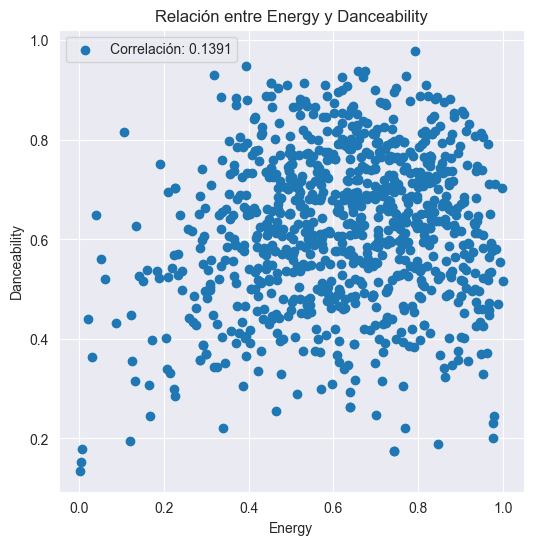

In [56]:
import matplotlib.pyplot as plt
import scipy.stats as stats
variable_1 = "Energy"
variable_2 = "Danceability"

# Extraer las columnas del DataFrame
datos_columna1 = copy_covers_ds[variable_1]
datos_columna2 = copy_covers_ds[variable_2]

# creamos el scatter plot
plt.figure(figsize=(6, 6))  
plt.scatter(copy_covers_ds[variable_1], copy_covers_ds[variable_2])
plt.xlabel(variable_1)
plt.ylabel(variable_2)
plt.title("Relación entre {} y {}".format(variable_1, variable_2))

# calcular la correlación de Pearson usando SciPy
coeficiente_correlacion, _ = stats.pearsonr(datos_columna1, datos_columna2)
# agregar la leyenda con el valor del coeficiente de correlación
plt.legend([f"Correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

# Mostrar el gráfico
plt.grid(True)
plt.show()

A simple vista solo se ve una nube de puntos sin direccion. La correlacion dda muy baja, del 0.13. No logramos detectar visualmente si podria llegar a existir otro tipo de relacion que no sea lineal.

Podemos probar a ver si existen grupos dentro de Energy 

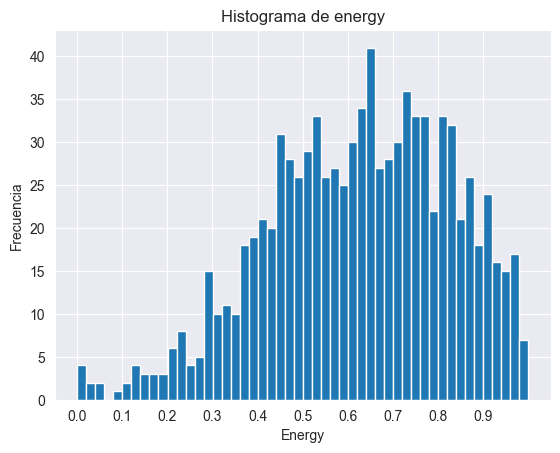

In [55]:
bins = 50

plt.hist(copy_covers_ds['Energy'], bins = bins)

plt.xlabel('Energy')
plt.ylabel('Frecuencia')
plt.title('Histograma de energy')
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

Podemos separarlo en 3 grupos. Uno que vaya de 0.0 a 0.3(baja energia), otro de 0.3 a 0.6(energia media) y de 0.6 a 1.0(mucha energia)

In [57]:
#Hamos los bins para separar los grupos
bins = [0.0, 0.3, 0.6, 1.0]
#Definimos las labels
labels = ['baja_energia', 'media_energia', 'alta_energia']
#Armamos los grupos
copy_covers_ds['Energy_groups']= pd.cut(copy_covers_ds['Energy'], bins=bins, labels=labels)

Ahora hacemos un boxplot para comparar la variabilidad de cada grupo respecto a los valores de Danceability

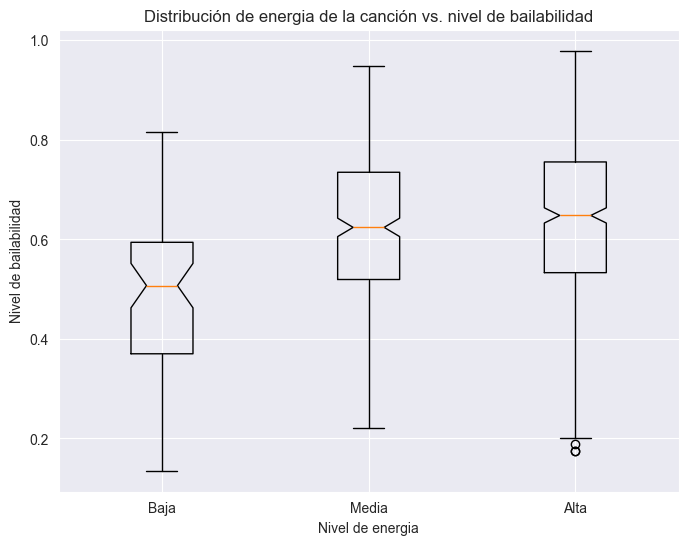

In [61]:
plt.figure(figsize=(8, 6))
plt.boxplot([copy_covers_ds[copy_covers_ds["Energy_groups"] == "baja_energia"]["Danceability"],
             copy_covers_ds[copy_covers_ds["Energy_groups"] == "media_energia"]["Danceability"],
             copy_covers_ds[copy_covers_ds["Energy_groups"] == "alta_energia"]["Danceability"]],
             tick_labels=["Baja", "Media", "Alta"], notch=True)

# Agregar etiquetas a los ejes
plt.xlabel("Nivel de energia")
plt.ylabel("Nivel de bailabilidad")

# Agregar un título al gráfico
plt.title("Distribución de energia de la canción vs. nivel de bailabilidad")

# Mostrar el gráfico
plt.show()


Vemos que existe una diferencia significativa entre el primer grupo y los demás. Sin embargo, no existe tal diferencia entre el grupo dos y el tres
Para ver si existen o no diferencias estadísticamente significativas entre los grupos con ANOVA

Primero tendremos que verificar los supuestos de ANOVA. Empezaremos con la normalidad de los datos

In [ ]:
from scipy.stats import shapiro

# Separamos los datos en tres grupos, poca energia, media energia y alta energia
poca_energia = copy_covers_ds[copy_covers_ds['Energy_groups'] == 'baja_energia']['Danceability']
media_energia = copy_covers_ds[copy_covers_ds['Energy_groups'] == 'media_energia']['Danceability']
alta_energia = copy_covers_ds[copy_covers_ds['Energy_groups'] == 'alta_energia']['Danceability']

# Test de Shapiro-Wilk para poca energia
stat, p = shapiro(poca_energia)
print(f"Test de Shapiro-Wilk para poca energia: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para media energia
stat, p = shapiro(media_energia)
print(f"Test de Shapiro-Wilk para media energia Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para alta energia
stat, p = shapiro(alta_energia)
print(f"Test de Shapiro-Wilk para alta energia: Estadístico={stat:.3f}, p-valor={p:.3f}")

Hacemos un QQ-plot para hacer la comprobación de normalidad

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para energia baja
stats.probplot(poca_energia, dist="norm", plot=plt)
plt.title("QQ Plot para la bailabilidad de la canción según energia baja")
plt.show()

# QQ plot para energia media
stats.probplot(media_energia, dist="norm", plot=plt)
plt.title("QQ Plot para la bailabilidad de la canción según energia media")
plt.show()

#QQ plot para energia alta
stats.probplot(alta_energia, dist="norm", plot=plt)
plt.title("QQ Plot para la bailabilidad de la canción según energia alta")
plt.show()

En conclusión, ni Shapiro ni el QQ-plot nos están mostrando normalidad en los datos, así que no podemos usar el test de ANOVA.

Comprobaremos la homocedastecidad de los datos mediante el test de Levene. De esta manera podremos determinar si existe una diferencia significativa entre las varianzas de los grupos

In [ ]:
stat, p = stats.levene(poca_energia, media_energia, alta_energia)
print(f"Test de Levene para grupos de energia: Estadístico={stat:.3f}, p-valor={p:.3f}")

Por el test de Levene comprobamos que existe homocedasticidad en los grupos. Por lo tanto podemos aplicar el test de Kruskal-Wallis para conocer si son o no estadísticamente diferentes entre sí

In [ ]:
# Test de Kruskal-Wallis para comparar el nivel de bailabilidad entre canciones con distintos niveles de energía
stat, p = stats.kruskal(poca_energia, media_energia, alta_energia)
print(f"Test de Kruskal-Wallis para Danceability: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el nivel de bailabilidad entre canciones con distintos niveles de energía.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el nivel de bailabilidad entre canciones con distintos niveles de energía.")

Por lo tanto, podemos afirmar que existen diferencias significativas entre los grupos. Es decir que efectivamente, para niveles más bajos de energía, las canciones son menos bailables y, para niveles más altos, las canciones tienen características que las hacen más bailables
Se ve una gran diferencia entre el nivel más bajo de energía con el nivel más alto, pero no tento entre el nivel medio y el más alto, cosa que a primeras parece un poco sospechoso

### Análisis de ```Valence vs Mode```

Ahora analizaremos la relación que existe entre el nivel de positividad de la canción y el tono en el que se escribió(mayor o menor)<br>
Para ello, dividiremos la variable Valance según el Mode(0 o 1)

In [ ]:
# Filtrar las canciones en modo menor (Mode = 0) y modo mayor (Mode = 1)
valence_menor = copy_covers_ds[copy_covers_ds['Mode'] == 0]['Valence']
valence_mayor = copy_covers_ds[copy_covers_ds['Mode'] == 1]['Valence']

In [ ]:
valence_menor.describe()

In [ ]:
valence_mayor.describe()

Se puede ver observando los valores de media y mediana que, en promedio, las canciones en modo menor tienen un Valence (positividad) ligeramente superior, aunque la diferencia es pequeña<br>
La desviación estándar es similar en ambos grupos (0.23 para menor y 0.25 para mayor), es decir, la variabilidad es comparable.<br>
Dado que las medias y medianas no difieren significativamente a simple vista, una prueba de Mann-Whitney podría confirmar si estas diferencias son significativas

Podemos hacer un boxplot para ver esta diferencia de forma gráfica

In [ ]:
plt.figure(figsize=(6, 6)) 
plt.boxplot([copy_covers_ds[copy_covers_ds['Mode'] == 0]['Valence'], copy_covers_ds[copy_covers_ds['Mode'] == 1]['Valence']], tick_labels=["Menor", "Mayor"], notch=True)
# Agregar etiquetas a los ejes
plt.xlabel("Modo de la canción")
plt.ylabel("Positividad")

# Agregar un título al gráfico
plt.title("Distribución de la variable Valance según el Modo")

# Mostrar el gráfico
plt.show()

Como se observa, las diferencias son poco apreciables pero hay que ver si estadísticamente son significativas o no

In [63]:
from scipy.stats import shapiro

# Test de Shapiro-Wilk para valence con modo menor
stat, p = shapiro(valence_menor)
print(f"Test de Shapiro-Wilk para poca energia: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para valence con modo mayor
stat, p = shapiro(valence_mayor)
print(f"Test de Shapiro-Wilk para media energia Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para poca energia: Estadístico=0.976, p-valor=0.000
Test de Shapiro-Wilk para media energia Estadístico=0.971, p-valor=0.000


Como no comprobamos normalidad, no podemos tirarnos por hacer un test t.

Dado que las medias y medianas no difieren significativamente a simple vista, una prueba de Mann-Whitney podría confirmar si estas diferencias son significativas

In [ ]:
# Test de Mann-Whitney U para comparar Valence entre modo menor y modo mayor(escala menor y mayor)
stat, p = stats.mannwhitneyu(valence_menor, valence_mayor)
print(f"Test de Mann-Whitney U para Valence : Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en las canciones entre escala mayor o menor.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en las canciones entre escala mayor o menor.")

Por consiguiente, podemos asegurar que las diferencias en las canciones con modo mayor y menos son estadísticamente significativas<br>
Esto sugiere que, en general, las canciones en escala menor tienden a ser más positivas más alto, lo que implica que podrían ser percibidas como más positivas o alegres que las canciones en escala mayor. Es decir que se confirmó lo contrario a lo que suponíamos. Realmente interesante😲

### Análisis de ```Loudness vs Energy```

Queremos ver si la medida de ruido de la canción está relacionada o no con los niveles de energía que posee. Podemos hacer un scatter plot para ver si están correlacionadas linealmente

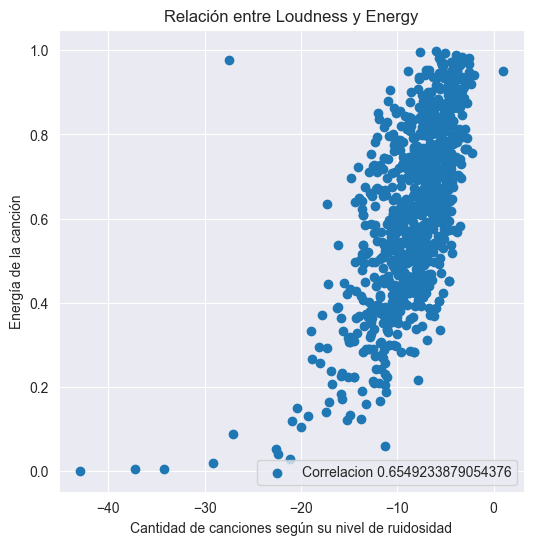

In [64]:
#Primero vamos a crear el scatter plot
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

#Calculamos el coeficiente de correlación con numpy
coeficiente_correlacion = np.corrcoef(copy_covers_ds['Loudness'], copy_covers_ds['Energy'])[0,1]

# Graficamos el scatter
plt.scatter(copy_covers_ds['Loudness'], copy_covers_ds['Energy'], label=f'Correlacion {coeficiente_correlacion}')

# Agregamos las etiquetas a los ejes
plt.xlabel("Cantidad de canciones según su nivel de ruidosidad")
plt.ylabel("Energía de la canción")

# Agregamos el título
plt.title("Relación entre Loudness y Energy")

# Agregamos una leyenda
plt.legend()

# Mostramos el gráfico de dispersión
plt.show()

Podemos ver que hay una tendencia cuadrática positiva en el gráfico ¿Quizás haya otra relación que no sea lineal?
También podríamos eliminar los outliers que aparecen para ver si están alterando el verdadero valor de la correlación

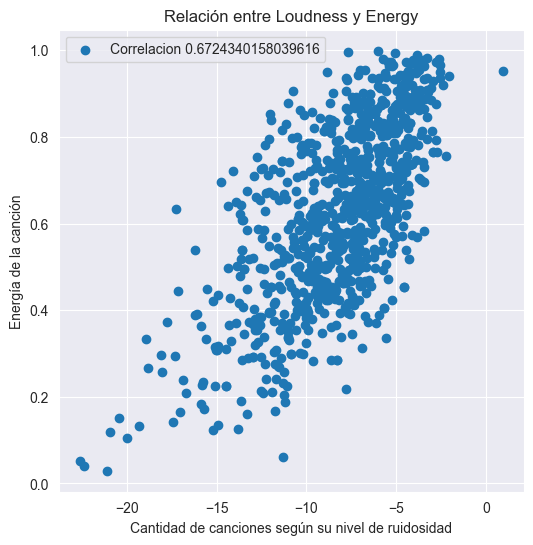

In [65]:
#Nos quedmos solo con los valores superiores a -25
copy_covers_ds = copy_covers_ds[copy_covers_ds['Loudness'] > -25]

#Primero vamos a crear el scatter plot
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado

#Calculamos el coeficiente de correlación con numpy
coeficiente_correlacion = np.corrcoef(copy_covers_ds['Loudness'], copy_covers_ds['Energy'])[0,1]

# Graficamos el scatter
plt.scatter(copy_covers_ds['Loudness'], copy_covers_ds['Energy'], label=f'Correlacion {coeficiente_correlacion}')

# Agregamos las etiquetas a los ejes
plt.xlabel("Cantidad de canciones según su nivel de ruidosidad")
plt.ylabel("Energía de la canción")

# Agregamos el título
plt.title("Relación entre Loudness y Energy")

# Agregamos una leyenda
plt.legend()

# Mostramos el gráfico de dispersión
plt.show()

Ahora eliminando los outliers podemos notar un poco más de presencia lineal en la correlación, lo que podría sugerir que a medida que aumenta la ruidosidad de la canción aumenta los niveles de energía(hipótesis). Sin embargo, para ver si esta correlación es estadísticamente significativa, podemos realizar una prueba de hipótesis usando una prueba de correlación de Pearson

In [68]:
from scipy.stats import pearsonr

coeficiente_correlacion, p_valor = pearsonr(copy_covers_ds['Loudness'], copy_covers_ds['Energy'])
print(f"Coeficiente de correlación: {coeficiente_correlacion}")
print(f"p-valor: {p_valor}")

Coeficiente de correlación: 0.6724340158039618
p-valor: 3.531061759559918e-121


Como el p-valor dió muy por debajo de los 0.05 indica que la correlación es estadísticamente significativa entre las variables, es decir, la relación no se dio de forma aleatoria y indica una relación real entre ellas. Por lo tanto, esto implica que las canciones con mayor nivel de ruidosidad tienden a ser también las que presentan niveles de energía más altos

### Análisis de ```Time_Signature vs Popularity```

Una hipotesis que nos planteamos para analizar mas es: Las canciones que no son de 4 pulsaciones por compás son menos populares.

Time Signature es una variable discreta con valores {1,3,4,5} ; Popularity es una variable discreta con valores de minimo: 0 y maximo: 92

Correlacion entre Time_Signature y Popularity: -0.0081


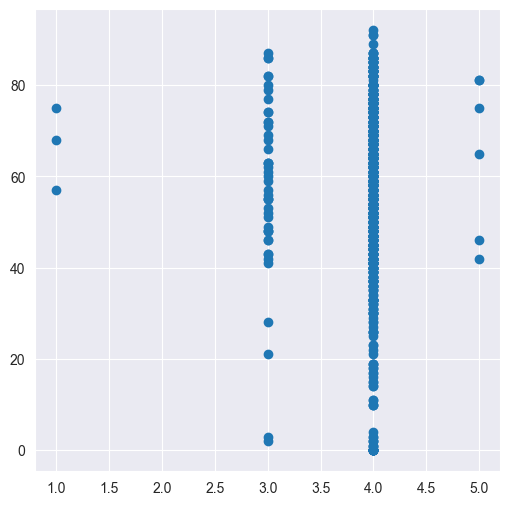

In [18]:
import numpy as np
from scipy import stats

variable_1 = "Time_Signature"
variable_2 = "Popularity"

datos_columna1 = copy_covers_ds[variable_1]
datos_columna2 = copy_covers_ds[variable_2]

coeficiente_correlacion = np.corrcoef(datos_columna1, datos_columna2)[0,1]

print(f"Correlacion entre {variable_1} y {variable_2}: {coeficiente_correlacion:.4f}")

plt.figure(figsize=(6, 6))
plt.scatter(datos_columna1, datos_columna2)
plt.show()


Vemos que las canciones con 1 no son poco populares. De las de 3, hay mucha variacion, hay un par que no son muy populares y otras que rondan el medio y lo mas alto. Con 5 hay algunas que son medianamente populares y otras que son un poco mas alto. Y de 4, que son la mayoria de las canciones, vemos que hay variacion de todo, alli se encuentra la cancion menos popular y la mas popular tambien.

In [19]:
descrip = copy_covers_ds.describe()
descrip_f = descrip[['Time_Signature', 'Popularity']]
print(descrip_f)


       Time_Signature  Popularity
count      919.000000  919.000000
mean         3.947769   57.722524
std          0.286769   17.599522
min          1.000000    0.000000
25%          4.000000   49.000000
50%          4.000000   60.000000
75%          4.000000   70.000000
max          5.000000   92.000000


In [20]:
time1 = copy_covers_ds[copy_covers_ds['Time_Signature']=='1']
time3 = copy_covers_ds[copy_covers_ds['Time_Signature']== '3']
time4 = copy_covers_ds[copy_covers_ds['Time_Signature']== '4']
time5 = copy_covers_ds[copy_covers_ds['Time_Signature']== '5']

AttributeError: Text.set() got an unexpected keyword argument 'ticks_labels'

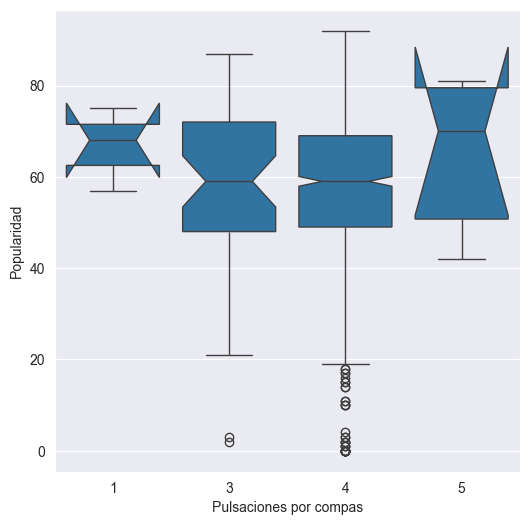

In [21]:
plt.figure(figsize=(6, 6)) 
sns.boxplot(x = 'Time_Signature', y = 'Popularity', data = copy_covers_ds, notch=True)

# Agregar etiquetas a los ejes
plt.xlabel("Pulsaciones por compas")
plt.ylabel("Popularidad")
plt.xticks(ticks_labels=["1", "3", "4", "5"])

# Agregar un título al gráfico
plt.title("")

# Mostrar el gráfico
plt.show()

Las formas extrañas en los time_signature 1 y 5 se deben a la poca cantidad de muestras. De 1 hay tres canciones y de 5 hay cinco canciones. 